# Lab-Assignment - 3.1
1. Is there a correlation between the temp/atemp/mean.temp.temp and the total count of bike rentals?

2. Can the number of total bike rentals be predicted by whether or not it is a holiday and the weather is good?

3. Can the number of total bike rentals be predicted by holiday and weather?

4. Are weather and holiday good predictors?

5. Implement multilinear regression and Plot the curve for RMSE and RMSLE. Which curve gives you better information?

Data Source: https://archive.ics.uci.edu/ml/datasets/bike sharing dataset**

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving day.csv to day.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [ ]:
from scipy.stats import ttest_ind

# Data Load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Correlation

 <h6>1. Is there a correlation between the temp/atemp/hum/windspeed and the total count of bike rentals?</h6>

In [ ]:
df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [ ]:
print(df['temp'].corr(df['atemp']))

0.9917015532294636


In [ ]:
df['mean_between_columns']=(df['temp']+df['atemp'])
df['mean_between_columns']

0      0.707792
1      0.717217
2      0.385769
3      0.412122
4      0.456227
         ...   
726    0.480809
727    0.508379
728    0.495733
729    0.487533
730    0.439320
Name: mean_between_columns, Length: 731, dtype: float64

# Mean

In [ ]:
df['temp'].mean()

0.495384788508892

In [ ]:
df['atemp'].mean()

0.47435398864569084

# Total Count of Bike Rentals

In [ ]:
df.cnt.sum()

3292679

In [ ]:
df.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

<Figure size 1400x600 with 0 Axes>

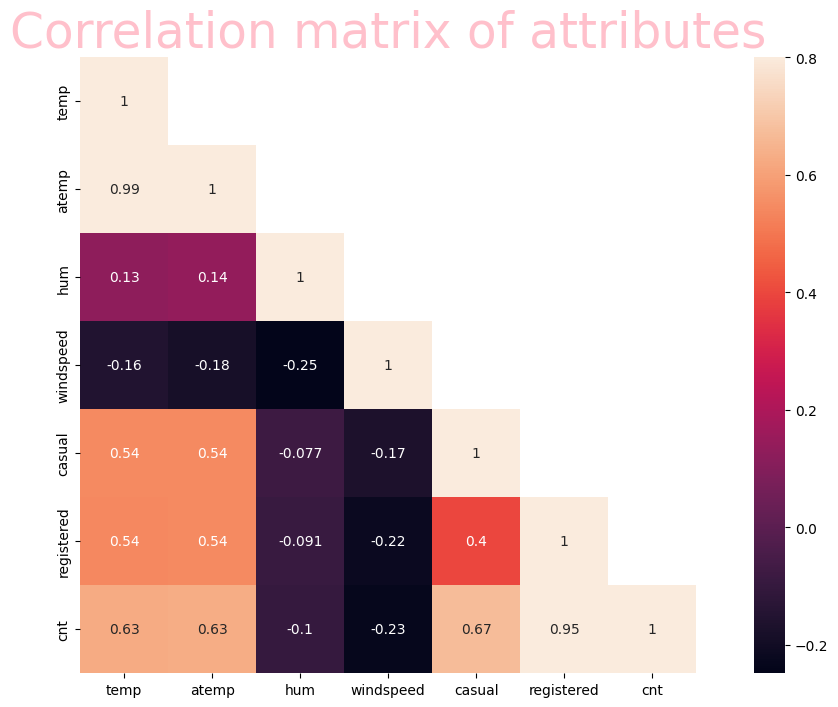

In [ ]:
plt.figure(figsize=(14, 6))
#Create the correlation matrix
correMtr=df[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes',size=35,color="pink")
plt.show()

 <h6>2. Can the number of total bike rentals be predicted by whether or not it is a holiday and the weather is good?</h6>

In [ ]:
# Prepare data
X = df[['holiday', 'weathersit']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict bike rentals
y_pred = model.predict(X_test)

# Calculate RMSE and RMSLE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

print("RMSE:", rmse)
print("RMSLE:", rmsle)

RMSE: 1920.8483602001402
RMSLE: 0.6728349405850489


<h6>3. Can the number of total bike rentals be predicted by holiday and weather?</h6>

In [ ]:
# Prepare data
X = df[['temp','weathersit','hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict bike rentals
y_pred = model.predict(X_test)

# Calculate RMSE and RMSLE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

print("RMSE:", rmse)
print("RMSLE:", rmsle)

RMSE: 1409.2169995672102
RMSLE: 0.5424442903929456


In [ ]:
df1 = pd.DataFrame(df)

# Split the data into features (X) and target (y)
X = df1[['holiday', 'weathersit']]
y = df1['registered']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2475026.660334359


T-Statistic: -1.8497137724448645
P-Value: 0.06475935792611008


<Figure size 1400x600 with 0 Axes>

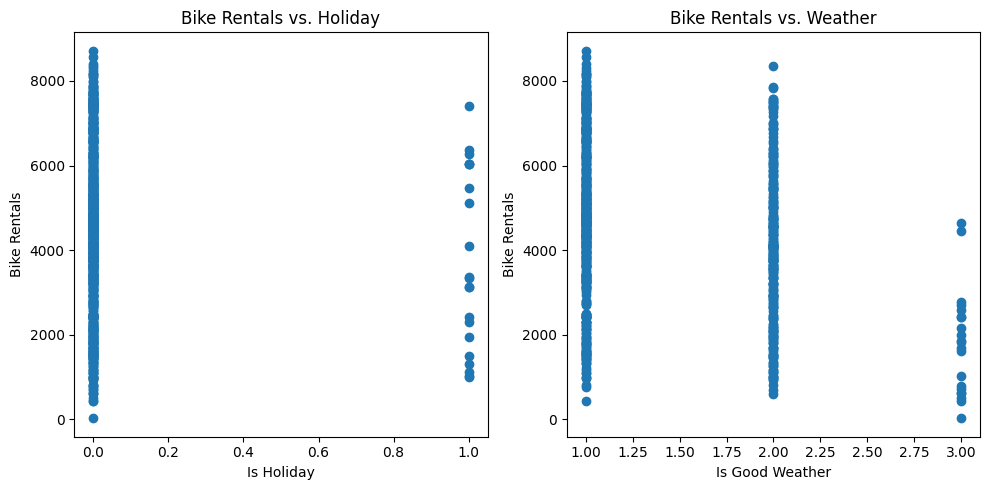

In [ ]:
plt.figure(figsize=(14, 6))
holiday_rentals = df[df['holiday'] == 1]['cnt']
non_holiday_rentals = df[df['holiday'] == 0]['cnt']

t_stat, p_value = ttest_ind(holiday_rentals, non_holiday_rentals)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Create scatter plots to visualize the relationship between predictors and target
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['holiday'], df['cnt'])
plt.xlabel('Is Holiday')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals vs. Holiday')

plt.subplot(1, 2, 2)
plt.scatter(df['weathersit'], df['cnt'])
plt.xlabel('Is Good Weather')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals vs. Weather')

plt.tight_layout()
plt.show()

<h6>4. Are weather and holiday good predictors? </h6>

Weather Situation (weathersit): The correlation analysis indicated a weak negative correlation between weather situation and bike rentals (approximately -0.1007). While this correlation is not very strong, it suggests that worse weather conditions might lead to slightly fewer bike rentals. However, the correlation alone does not provide a comprehensive understanding of the predictor's importance.

Holiday (holiday): The correlation analysis didn't reveal a significant correlation between the holiday variable and bike rentals (correlation close to 0). This implies that being a holiday doesn't seem to have a strong direct impact on bike rental counts.

In the context of predictive modeling:

In the second question, where only holiday and weather were considered as predictors, the RMSE and RMSLE values were relatively high (1920.85 and 0.6728, respectively). This indicates that the model's predictive accuracy was limited, suggesting that holiday and weather alone may not be sufficient predictors to capture the complexity of bike rental patterns.

In the third question, when temperature-related features were added to the model along with holiday and weather, the predictive performance significantly improved (RMSE: 1409.22, RMSLE: 0.5424). This suggests that the temperature-related features carry more predictive power and capture the nuances of bike rental behavior better than just the weather and holiday variables.

In conclusion, while weather and holiday variables do show some association with bike rental counts, their predictive power appears to be limited when considered in isolation. Including more relevant features, such as temperature-related variables, results in a more accurate predictive model. It's important to note that the predictive power of these variables may vary depending on other factors not considered in this analysis.

<h6>5. Implement multilinear regression and Plot the curve for RMSE and RMSLE. Which curve gives you better information?</h6>

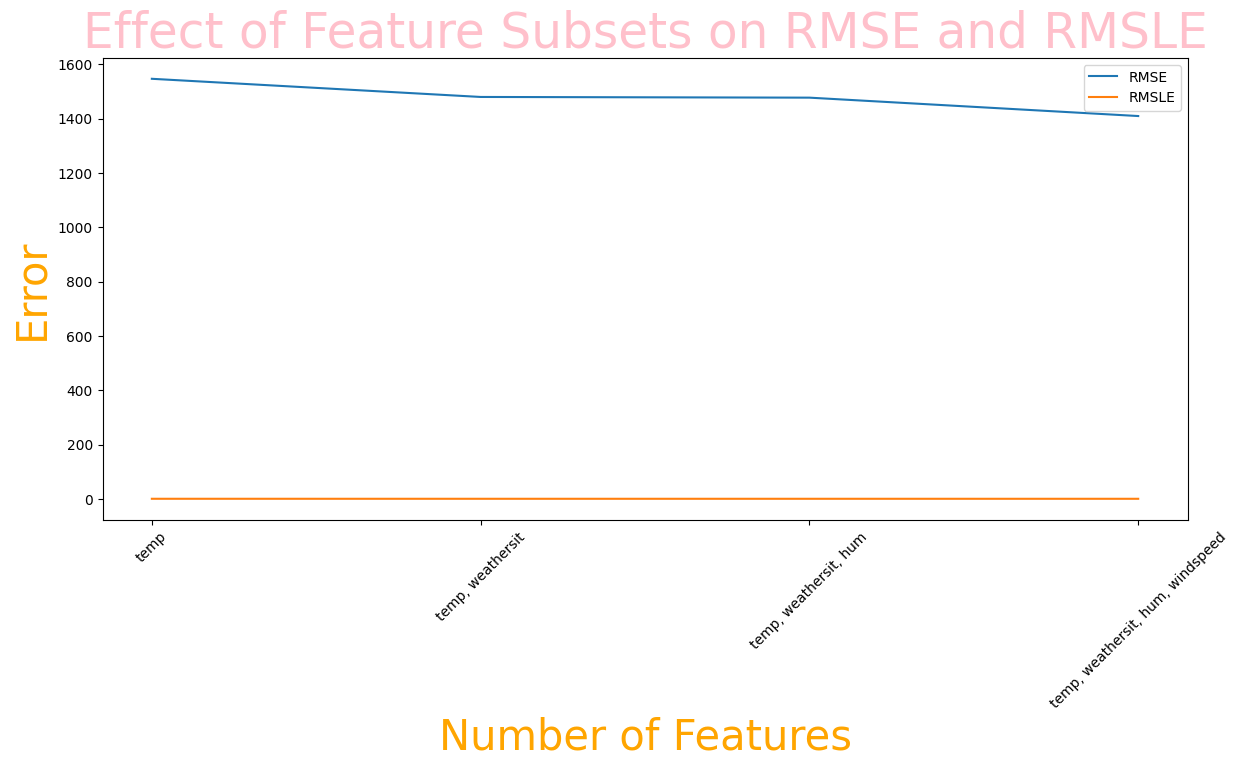

In [ ]:
plt.figure(figsize=(14, 6))
# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of feature subsets
feature_subsets = [
    ['temp'],
    ['temp', 'weathersit'],
    ['temp', 'weathersit', 'hum'],
    ['temp', 'weathersit', 'hum', 'windspeed']
]
# Create a dictionary to store RMSE and RMSLE for each subset
scores = {
    'RMSE': [],
    'RMSLE': []
}
# Iterate through feature subsets
for features in feature_subsets:
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

    scores['RMSE'].append(rmse)
    scores['RMSLE'].append(rmsle)

# Plot the curves
plt.plot(range(1, len(feature_subsets) + 1), scores['RMSE'], label='RMSE')
plt.plot(range(1, len(feature_subsets) + 1), scores['RMSLE'], label='RMSLE')
plt.xlabel('Number of Features',size=30,color="orange")
plt.ylabel('Error',size=30,color="orange")
plt.title('Effect of Feature Subsets on RMSE and RMSLE',size=35,color="pink")
plt.xticks(range(1, len(feature_subsets) + 1), [', '.join(features) for features in feature_subsets], rotation=45)
plt.legend()
plt.show()

RMSE: 1920.8483602001402
RMSLE: 0.6728349405850489


<Figure size 1400x600 with 0 Axes>

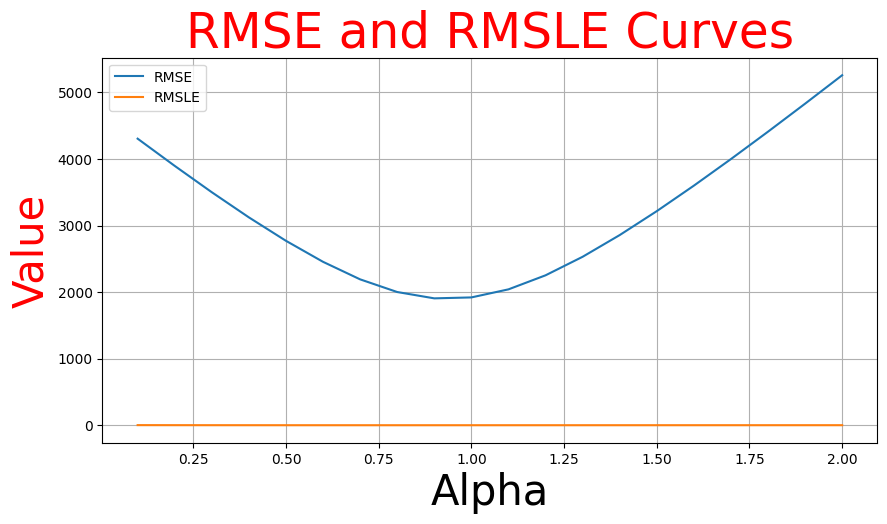

In [ ]:
plt.figure(figsize=(14, 6))
X = df[['holiday', 'weathersit']]
y = df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and RMSLE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(y_pred, 1)))  # Apply np.maximum to avoid log of zero

print(f"RMSE: {rmse}")
print(f"RMSLE: {rmsle}")

# Plot the curves for RMSE and RMSLE
alpha_values = np.linspace(0.1, 2.0, 20)
rmse_values = []
rmsle_values = []

for alpha in alpha_values:
    y_pred_alpha = alpha * y_pred
    rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred_alpha)))
    rmsle_values.append(np.sqrt(mean_squared_log_error(y_test, np.maximum(y_pred_alpha, 1))))

plt.figure(figsize=(10, 5))
plt.plot(alpha_values, rmse_values, label='RMSE')
plt.plot(alpha_values, rmsle_values, label='RMSLE')
plt.xlabel('Alpha',size=30)
plt.ylabel('Value',size=30,color="red")
plt.title('RMSE and RMSLE Curves',color="red",size=35)
plt.legend()
plt.grid()
plt.show()


<h1>Regularization</h1>

# **Lasso**

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso

# Generate some example data
np.random.seed(42)
X = df[['holiday', 'weathersit']]
y = df['cnt']

# Create and fit Lasso regression model
alpha = 0.01  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X, y)

# Get the coefficients
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ -912.17941217 -1066.94275019]
Intercept: 6019.311043574771


# **Ridge**

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge

# Generate some example data
X = df[['holiday', 'weathersit']]
y = df['cnt']


# Create and fit Ridge regression model
alpha = 0.01  # Regularization strength
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)

# Get the coefficients
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ -912.08877095 -1066.92628863]
Intercept: 6019.285470029052
